# Question 3 - Solution

### Overview and data required

> The task is to design a way of predicting when the TV will be turned on.
In order to complete the task, data needs to be collected over a certain period of time. The data would need to 
contain the following features:
 - Time stamp - this could be hours, minutes or seconds depending on the accuracy of the prediction that is required. 
 For example, for a time stamp in minutes if the TV is on for less than a minute this will not be registered as 
 a sample which may have negative effects on the prediction. For this reason a time stamp of a format hh:mm:ss should 
 selected. 
 - Day of the week - Due to the nature of the problem, the day of the week plays an important role in the governing 
  when the TV  will be on. As shown by the Exploratory Data Analysis below, turning the TV on certain days is far more 
  likelly than on others. This feature is also heavily corelated with the time stamp
 - Weekend/Weekday - consist of binary data (0 for Weekday, 1 for Weekend)
 - Total Power Consumption - measured in Kilowatts 
 - TV Consumption - measured in watts 
 - Voltage - minute-averaged voltage (measured in volts)
 

### Techniques and algorithms 



**Random Forest Classifier**

The random forest classifier is an ensemble machine learning algorithm that uses many decision trees to split the data
and make prediction. The algorithm performs well on large datasets and is also capable of hadling missing data and 
maintaining high accuracy when a portion of the data is missing. Furthemore, in case of a dataset that is class unbalanced
is is capable of balancing the error. One particular advantage of this method is that individual decision trees can be analysed and attribute and value upon which the splitting occurs can be analysed. This in turn can lead to improvements in the final classification. 
An implementation of the Random Forest Classifier is shown below using a total 100 decision trees. For this implementation 
the sklearn library is used. Although the recall and precision produced by the sklearn classification report show 100% for 
both 0 and 1(i.e when the TV is turned on or off), this should in no way suggest that this implementation will perform 
the same way in a real situation with a considerably more data and input features. The implementation just aims to show
a possible way of implementing the Random Forest Classification algorithm.

**SVM**

Support Vector Machine's model represents data samples as points in space. The points are mapped so that examples 
belonging to different classes are devided by a clear gap that is as wide as possible. Compared to Random Forest 
Classifier, SVMs can be seen as an improvement as in general they offer higher accuracy, however this comes at a cost
of SVMs being more difficult to interpret compared to Random Forest Classifier. SVMs also require more data pre-processing.

**LSTM**

Long-Short-Term Memory network is a type of a recurrent neural network which has good performance on time series data.
It can in many cases deliver higher performance compared to SVMs and Random Forest Classifier, however it is more 
difficult to interpret and requires a large data set to produce high performce. 

### Possible issues 

> One possible issue is related to the fact that each household may have a different pattern of turning the TV on. 
This may result in a drop in the algorithm's performce so it is important to gather data  from a variety of households
in different regions. 
Also the type of the TV set may prove to be a factor since different TV sets consume differnt amounts of power. 
In a case where a household has multiple sets, data gathering becomes more difficult as well as predicting when the 
TV will be switched ON.

In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
# Reading the data.
data = pd.read_excel('C:\Users\Botev\Desktop\data_TV.xlsx')

In [58]:
data.head()

,Time Stamp,TV_consump,Total_consump
0,0,0.0,4.908
1,1,0.0,4.528
2,2,0.0,5.063
3,3,0.0,4.314
4,4,0.0,4.830


In [59]:
# Introducing another column 'TV_ON' to represent the TV being on or off.
# If there is no power consumption TV is off, otherwise it is ON
data['TV_ON'] = data['TV_consump'].apply(lambda x: 1 if x!=0 else 0)

In [60]:
data.head()

,Time Stamp,TV_consump,Total_consump,TV_ON
0,0,0.0,4.908,0
1,1,0.0,4.528,0
2,2,0.0,5.063,0
3,3,0.0,4.314,0
4,4,0.0,4.830,0


In [45]:
# An overall view of the data. 
# The dataset consists of a total of 172782 data samples. 
data.describe()

,Time Stamp,TV_consump,Total_consump,TV_ON
count,172782.000000,172782.000000,172782.000000,172782.000000
mean,86390.500000,11.926304,121.804287,0.173178
std,49878.011443,26.756472,373.031964,0.378402
min,0.000000,0.000000,2.798000,0.000000
25%,43195.250000,0.000000,6.338000,0.000000
50%,86390.500000,0.000000,69.948000,0.000000
75%,129585.750000,0.000000,75.925750,0.000000
max,172781.000000,101.005000,3137.189000,1.000000


### Introducing new columns 

In [61]:
data['Hour'] = data['Time Stamp'].apply(lambda x:x/3600)

In [62]:
data['Day'] = data['Hour'].apply(lambda x:'Day 1' if x<=24 else 'Day 2')


In [63]:
data.head()

,Time Stamp,TV_consump,Total_consump,TV_ON,Hour,Day
0,0,0.0,4.908,0,0,Day 1
1,1,0.0,4.528,0,0,Day 1
2,2,0.0,5.063,0,0,Day 1
3,3,0.0,4.314,0,0,Day 1
4,4,0.0,4.830,0,0,Day 1


In [20]:
data['TV_ON'].value_counts()
# There are only 29922 samples when the TV was on compared to 172782 samples in total. 

0    142860
1     29922
Name: TV_ON, dtype: int64

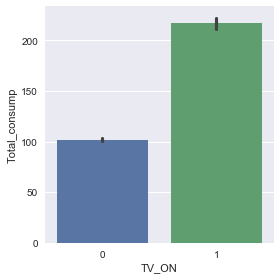

In [22]:
sns.factorplot(x="TV_ON",y="Total_consump",data=data,kind="bar")
# From the graph below it can be observed that the total consumtion is considerably higher
# during the period of the TV being on. However this does not take into account other electrical
#appliences that could potentially be on. 

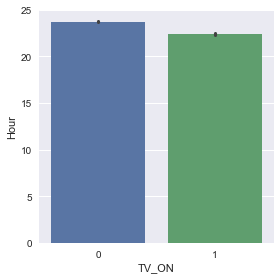

In [9]:
sns.factorplot(x="TV_ON",y="Hour",data=data,kind="bar")

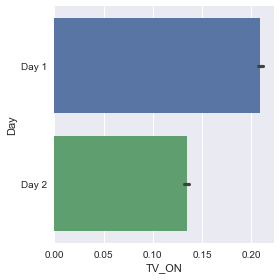

In [10]:
# The day proves to be an important feature regarding the TV being turned on or off.
sns.factorplot(x="TV_ON",y="Day",data=data,kind="bar")

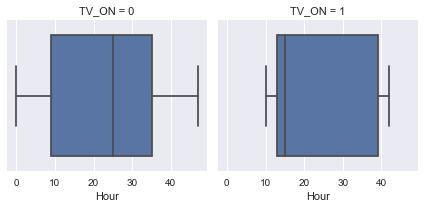

In [11]:
g = sns.FacetGrid(data, col = 'TV_ON')
g.map(sns.boxplot, 'Hour')

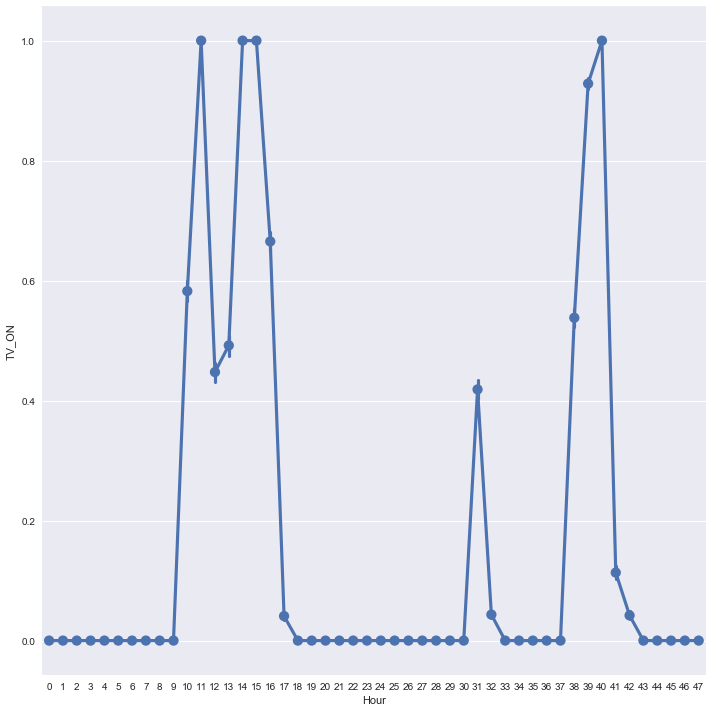

In [12]:
sns.factorplot(x= 'Hour', y = 'TV_ON', data = data, size = 10)

> Conclusion

Looking at the factor plot above, it can be observed that the TV was ON considerably longer for Day 1
compared to Day 2. An assumption can be made that unless either Day 1 or Day 2 were outliers, the 
difference can be attributed to Day 1 being a specific day of the week namelly Sunday and Day 2 
being a working day- Monday - Friday. 

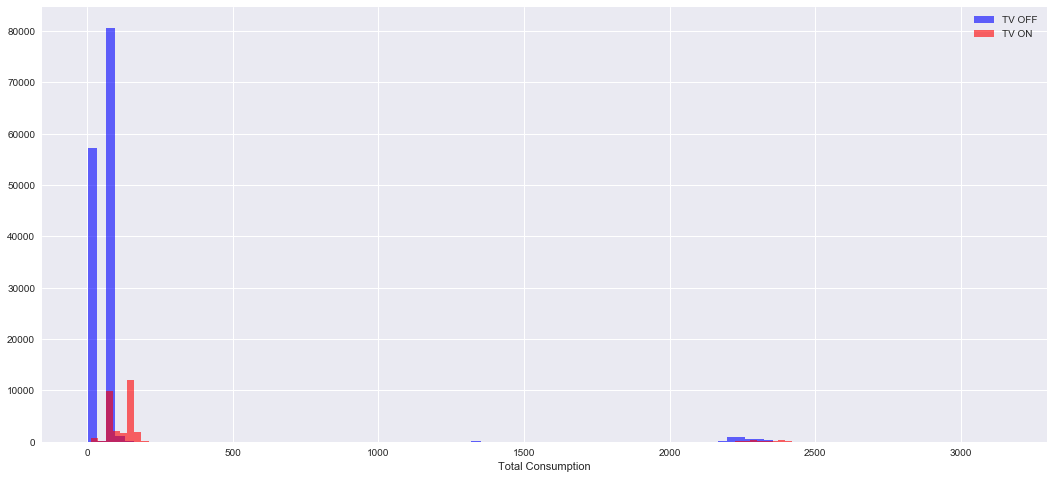

In [79]:
plt.figure(figsize=(18,8))

data[data['TV_ON']==0]['Total_consump'].hist(bins=100,color='blue',
                                            label = 'TV OFF',
                                            alpha = 0.6)

data[data['TV_ON']==1]['Total_consump'].hist(bins=100,color='red',
                                            label = 'TV ON',
                                            alpha = 0.6)
plt.legend()
plt.xlabel('Total Consumption')

In [38]:
data['Total_consump'].max()

3137.1889999999999

In [40]:
data['Total_consump'].min()

2.798

In [41]:
# can observe that for those two days the TV power consumption is either in the lower end or at the higher end.


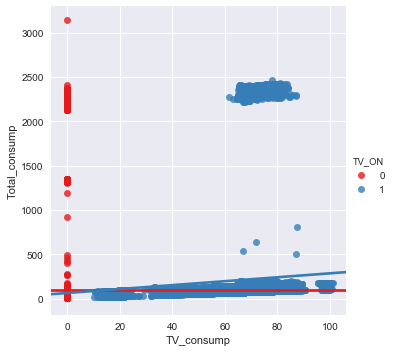

In [48]:
plt.figure(figsize = (50,22))

sns.lmplot(y = 'Total_consump',x = 'TV_consump',data = data,hue = 'TV_ON',palette='Set1')



### Random Forest Classifier

#### Data Preparation

> First the numerical columns need to be normalised. This leads to introducing two new columns:
TV_Consumption_norm and Total_consump_norm.

In [65]:
data["TV_Consumtion_norm"] = (data["TV_consump"] - data["TV_consump"].mean())/(data["TV_consump"].max()-data["TV_consump"].min())

In [66]:
data["Total_consump_norm"] = (data["Total_consump"] - data["Total_consump"].mean())/(data["Total_consump"].max()-data["Total_consump"].min())

In [67]:
data.head()

,Time Stamp,TV_consump,Total_consump,TV_ON,Hour,Day,TV_Consumtion_norm,Total_consump_norm
0,0,0.0,4.908,0,0,Day 1,-0.118076,-0.037295
1,1,0.0,4.528,0,0,Day 1,-0.118076,-0.037416
2,2,0.0,5.063,0,0,Day 1,-0.118076,-0.037245
3,3,0.0,4.314,0,0,Day 1,-0.118076,-0.037484
4,4,0.0,4.830,0,0,Day 1,-0.118076,-0.037320


#### Implementation

In [56]:
# Number of decision trees used in the Random Forest is 100.
classifier = RandomForestClassifier(n_estimators=100)

> Three features are used for the classification: TV_Consumtion_norm','Hour','Total_consump_norm.
The feature that will be predicted is: TV_ON

In [68]:
X = data[['TV_Consumtion_norm','Hour','Total_consump_norm']]
Y = data['TV_ON']

In [70]:
# 40% of the data is used for testing purposes, 60% for training purposes.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 101)

In [71]:
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [73]:
pred = classifier.predict(X_test)

In [76]:
print classification_report(Y_test,pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     57222
          1       1.00      1.00      1.00     11891

avg / total       1.00      1.00      1.00     69113



### Conclusion

> The precision and recall values outputed from the Random Forest Classifier indicate very high performance.
However this performance would drastically change when the algorithm is applied to a real data set. The way the 
dataset is structured will also have an impact on performance. For example noise in the data, skewed datapoints as 
well as class inbalance issues can have an inpact on the performance of the algorithm.